In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

In [ ]:
!pip install yfinance --upgrade --no cache-dir
!pip install yfinance
import yfinance as yf
yf.pdr_override()

#Obtendo dados do IBOVSPA


In [21]:
tickers = ['ABEV3.SA', 'ITSA4.SA', 'WEGE3.SA', 'USIM5.SA', 'VALE3.SA']
carteira = web.get_data_yahoo(tickers, period='5y')['Adj Close']
ibov = web.get_data_yahoo('^BVSP', period='5y')['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
carteira.head()

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-08-18,16.276962,4.406808,3.259039,15.219262,12.136276
2015-08-19,15.789003,4.341744,3.132945,14.712538,12.122484
2015-08-20,16.102692,4.329914,3.055349,15.000846,11.532957
2015-08-21,15.736718,4.294422,2.977753,14.590223,11.692441
2015-08-24,15.754150,4.205696,2.667368,13.454457,11.456686


In [23]:
ibov

Date
2015-08-18     47451.000000
2015-08-19     46588.000000
2015-08-20     46649.000000
2015-08-21     45720.000000
2015-08-24     44336.000000
                  ...      
2020-08-12    102118.000000
2020-08-13    100461.000000
2020-08-14    101353.000000
2020-08-17     99595.000000
2020-08-18    101894.328125
Name: Adj Close, Length: 1235, dtype: float64

#Resultados

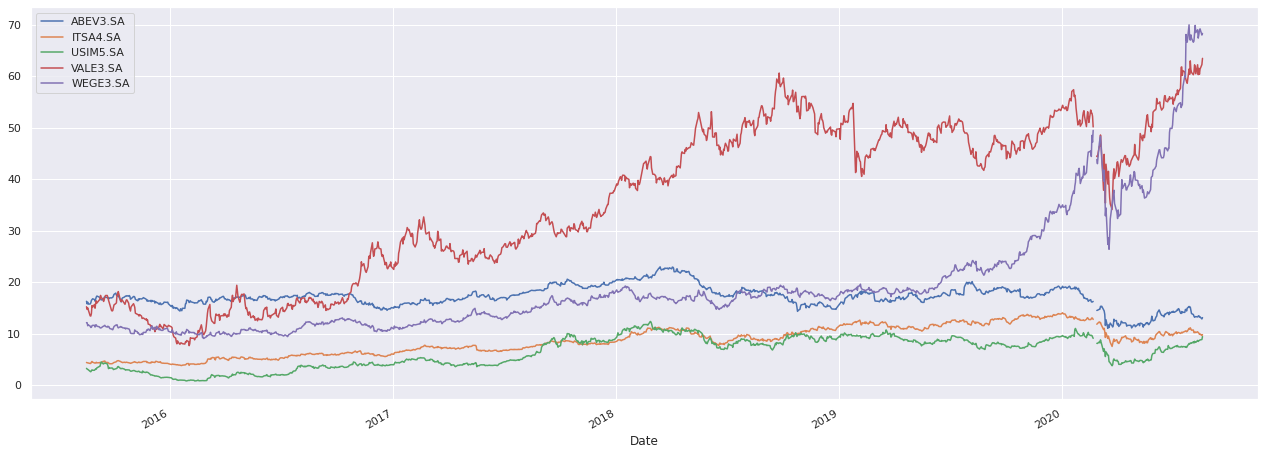

In [24]:
sns.set()
carteira.plot(figsize=(22, 8));

In [26]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,
2015-08-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
2015-08-19,9700.215003,9852.356903,9613.094942,9667.050640,9988.635692
2015-08-20,9892.934181,9825.510244,9374.999634,9856.486989,9502.879503
2015-08-21,9668.092797,9744.972433,9136.905058,9586.682452,9634.290412
2015-08-24,9678.802543,9543.633854,8184.523827,8840.413664,9440.033984
...,...,...,...,...,...
2020-08-12,8281.643288,22941.775288,26510.884165,40409.317812,56030.366009
2020-08-13,8115.764975,22374.471231,26664.301286,39653.695420,56771.945640
2020-08-14,8146.483355,22533.317838,26940.456787,40310.757498,56994.416386


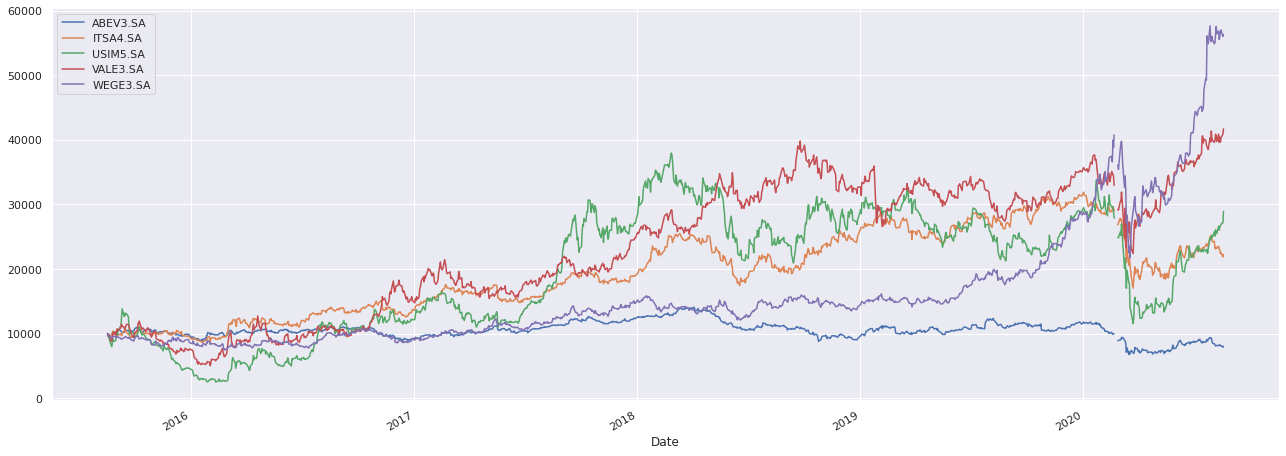

In [29]:
carteira_normalizada.plot(figsize=(22, 8));

In [38]:
carteira_normalizada['saldo'] = carteira_normalizada.sum(axis=1)
carteira_normalizada

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,
2015-08-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,100000.000000
2015-08-19,9700.215003,9852.356903,9613.094942,9667.050640,9988.635692,97642.706362
2015-08-20,9892.934181,9825.510244,9374.999634,9856.486989,9502.879503,96905.621102
2015-08-21,9668.092797,9744.972433,9136.905058,9586.682452,9634.290412,95541.886303
2015-08-24,9678.802543,9543.633854,8184.523827,8840.413664,9440.033984,91374.815745
...,...,...,...,...,...,...
2020-08-12,8281.643288,22941.775288,26510.884165,40409.317812,56030.366009,308347.973124
2020-08-13,8115.764975,22374.471231,26664.301286,39653.695420,56771.945640,307160.357104
2020-08-14,8146.483355,22533.317838,26940.456787,40310.757498,56994.416386,309850.863728


In [40]:
ibov_normalizado = (ibov/ibov.iloc[0])*50000
ibov_normalizado

Date
2015-08-18     50000.000000
2015-08-19     49090.640872
2015-08-20     49154.917705
2015-08-21     48176.013150
2015-08-24     46717.666646
                  ...      
2020-08-12    107603.633222
2020-08-13    105857.621546
2020-08-14    106797.538513
2020-08-17    104945.101262
2020-08-18    107367.946013
Name: Adj Close, Length: 1235, dtype: float64

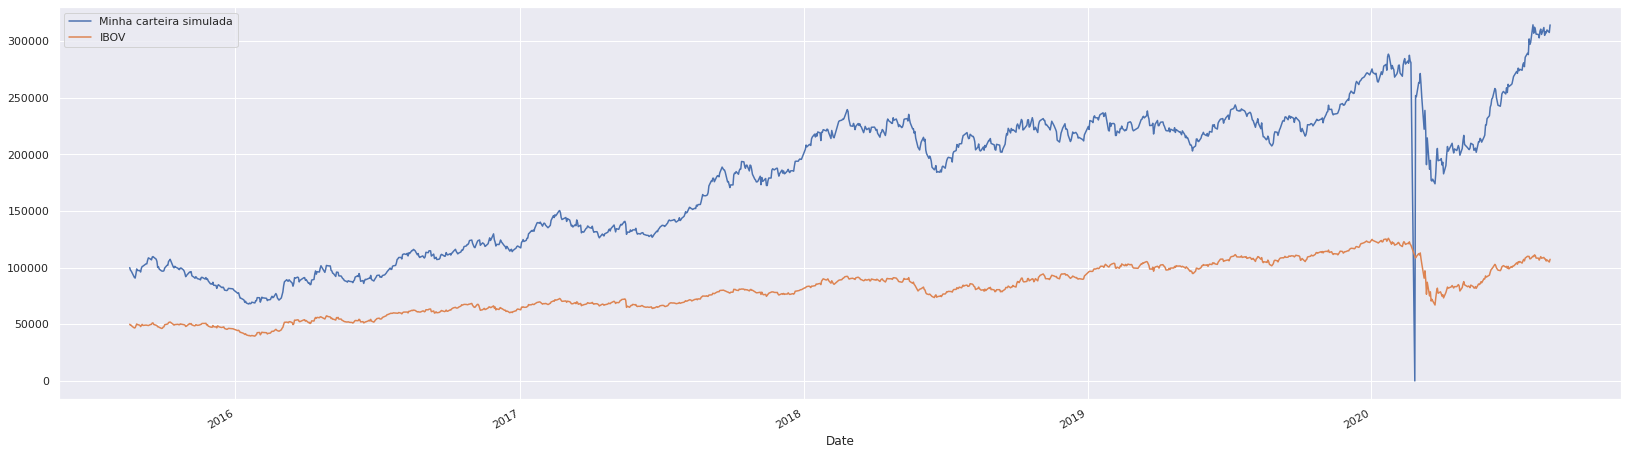

In [43]:
#simulando a nossa carteira
carteira_normalizada['saldo'].plot(figsize=(28, 8), label='Minha carteira simulada')
ibov_normalizado.plot(label='IBOV')
plt.legend();